In [1]:
import lux
import pandas as pd


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/college.csv")
df.head()


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.intent = ["AverageCost","SATAverage"]
df


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df.columns

Index(['Name', 'PredominantDegree', 'HighestDegree', 'FundingModel', 'Region',
       'Geography', 'AdmissionRate', 'ACTMedian', 'SATAverage', 'AverageCost',
       'Expenditure', 'AverageFacultySalary', 'MedianDebt',
       'AverageAgeofEntry', 'MedianFamilyIncome', 'MedianEarnings'],
      dtype='object')

In [10]:
df.intent = ["MedianFamilyIncome","SATAverage"]
df


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df.intent = ["FundingModel","SATAverage"]
df


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
df.intent = ["FundingModel"]
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:
from lux.vis.Vis import Vis
Vis(["Region=New England","MedianEarnings"],df)


LuxWidget(current_vis={'config': {'view': {'continuousWidth': 400, 'continuousHeight': 300}, 'axis': {'labelCo…

In [8]:
from lux.vis.VisList import VisList
VisList(["Region=?","AverageCost"],df)


LuxWidget(recommendations=[{'action': 'Vis List', 'description': 'Shows a vis list defined by the intent', 'vs…

In [9]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [17]:
df2 = df[df['Geography']== 'Distant Town']
df2 = df2[['MedianFamilyIncome','SATAverage']]
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [18]:
df2.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [21]:
import seaborn as sn

<AxesSubplot:>

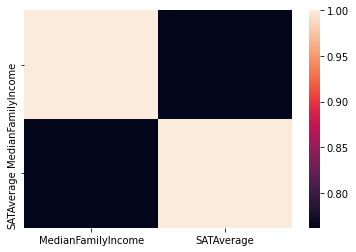

In [22]:
sn.heatmap(df2.corr())

In [23]:
from sklearn.linear_model import LinearRegression

In [31]:
y = df['SATAverage'].values # numerical values
X = df['MedianFamilyIncome'].values.reshape(-1,1)


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg.predict(X_test)



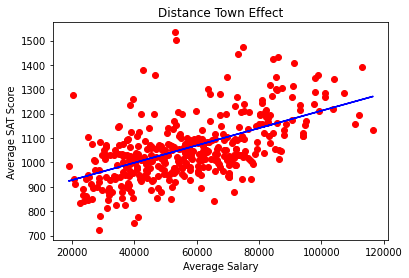

In [37]:
import matplotlib.pyplot as plt
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Distance Town Effect')
plt.xlabel('Average Salary')
plt.ylabel('Average SAT Score')
plt.show()

In [40]:
print(reg.score(X_test, y_test))

0.32600231788982603
